In [1]:
import pandas as pd
import numpy as np

In [2]:
final_df = pd.read_csv(r"D:\Canadian Business Analysis Project\data\final_processed_data.csv")

In [3]:
import seaborn as sns
sns.set_style('whitegrid')

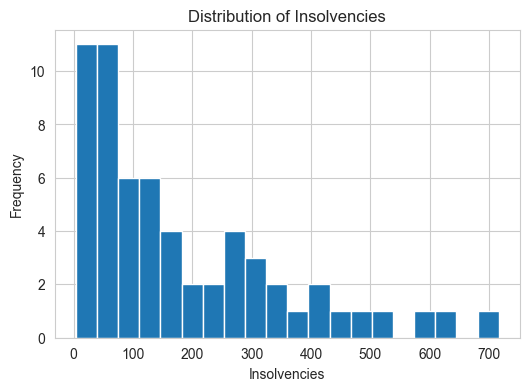

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(final_df["insolvencies"], bins=20)
plt.title("Distribution of Insolvencies")
plt.xlabel("Insolvencies")
plt.ylabel("Frequency")
plt.show()

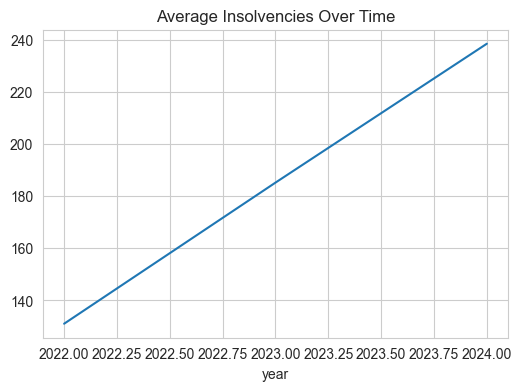

In [8]:
final_df.groupby("year")["insolvencies"].mean().plot(
    title="Average Insolvencies Over Time",
    figsize=(6,4)
)
plt.show()

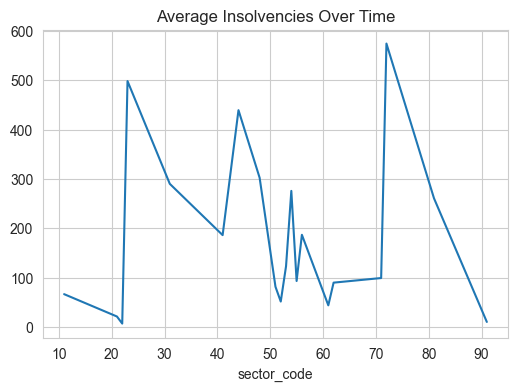

In [27]:
final_df.groupby("sector_code")["insolvencies"].mean().plot(
    title="Average Insolvencies Over Time",
    figsize=(6,4)
)
plt.show()

<Axes: xlabel='closures_lag1', ylabel='insolvencies'>

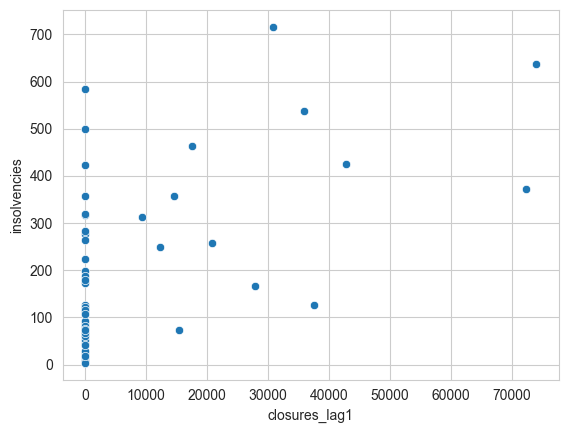

In [7]:
sns.scatterplot(data=final_df, x="closures_lag1", y="insolvencies")

In [8]:
# While most of the closures do occur where there is missing data, but when closures_lag1 increases, insolvencies are consistently high

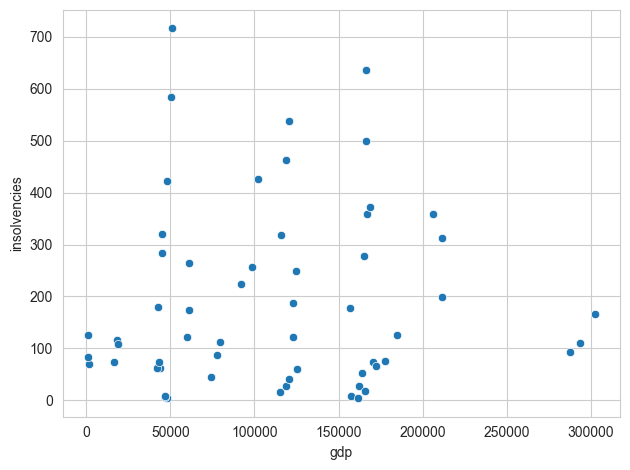

In [24]:
ax = sns.scatterplot(data=final_df, x="gdp", y="insolvencies")
plt.tight_layout()

In [25]:
#Sectors with high GDP can also have insolvencies, since most points are widely dispersed, GDP alone can't influence insolvency risk

In [5]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.express as px

In [40]:
fig = px.line(
    final_df,
    x = "year",
    y = "insolvencies",
    color="sector"
)
fig.show()

In [44]:
fig1 = px.line(
    final_df,
    x="closures_lag1",
    y="insolvencies",
    color="sector",
    log_x=True
)
fig1.show()

In [45]:
# Proves positive correlation, as lagged closures increases, insolvencies tend to be higher

In [6]:
fig2 = px.scatter(
    final_df,
    x="cpi_qoq_growth",
    y = "insolvencies",
    color="sector",
    trendline="ols"
)
fig2.show()

In [7]:
# Higher CPI means lower insolvencies, that is due to the fact that inflation rises , and demand increases so the businesses can pass
# higher prices to consumer

In [13]:
numeric_cols = final_df.select_dtypes(include="number")
corr = pd.DataFrame(numeric_cols.corr()["insolvencies"].sort_values(ascending=False))
print(corr)

                   insolvencies
insolvencies           1.000000
closures_lag1          0.553387
year                   0.252847
cpi                    0.250957
gdp_qoq_growth         0.083636
gdp                    0.043000
sector_code            0.010477
gdp_volatility_4q     -0.104565
cpi_yoy_growth        -0.140460
cpi_volatility_4q     -0.140460
cpi_qoq_growth        -0.247481


<Axes: >

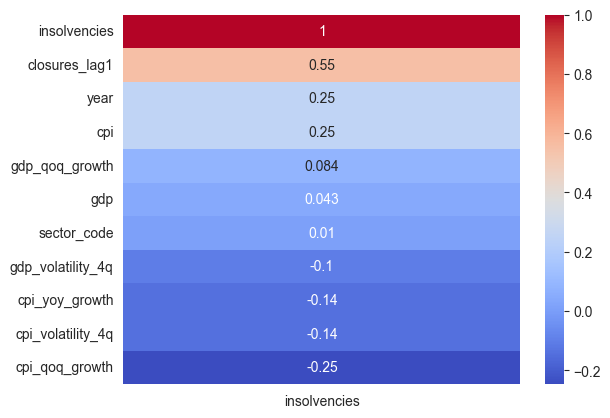

In [19]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [21]:
# closures_lag1 has highest positive correlation, which means sectors which experienced more closures in the previous years, 
# will experience higher insolvencies in the following period
# year and cpi have moderate correlation and suggests that macro trends contribute to more insolvencies but dont drive them alone
# GDP level and GDP growth have very weak correlations, meaning overall economic growth does not directly reduce sector-level insolvencies.
# Inflation growth and volatility are negatively correlated, suggesting insolvencies tend to occur after periods of instability rather than
# during them.

In [17]:
corr1 = final_df.corr(numeric_only=True)

<Axes: >

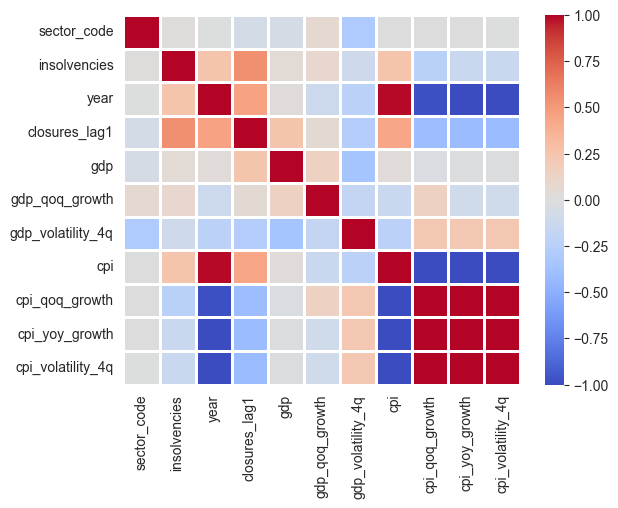

In [25]:
sns.heatmap(corr1, annot=False, cmap='coolwarm', alpha=1, linewidths=2)

In [28]:
# Insolvencies are most strongly correlated with closures_lag1, reinforcing that past sector distress is the dominant signal.

# year is highly correlated with CPI levels, showing inflation trends upward over time rather than directly causing insolvencies.